In [1]:
import sys, os
if "google.colab" in sys.modules and not os.path.exists(".setup_complete"):
    !wget -q https://raw.githubusercontent.com/ldmirl/llp131-practicals/master/setup_colab.sh -O- | bash
    !touch .setup_complete
    !wget -q https://raw.githubusercontent.com/ldmirl/llp131-practicals/master/requirements.txt
    !pip3 install -r requirements.txt

# This code creates a virtual display to draw game images.
# It will have no effect if your machine has a monitor
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ["DISPLAY"] = ":1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# OpenAI GYM

We are going to spend our time learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms. Implementing each of these problems ourselves would be tedious. That is where OpenAI GYM comes into play. It is a Python library that wraps many classical decision problems including robot control, video-games, and board-games.

### __Here's how it works:__

**Note**: if you are running this on your local machine, you will see a window pop up with the same image below. ***Don't close it!*** Just `alt-tab` away.

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


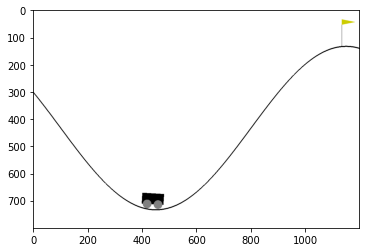

In [3]:
import gym

env = gym.make("MountainCar-v0")
env.reset()

plt.imshow(env.render("rgb_array")); env.close()
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

# GYM Interface

The three main methods of an environment are:

| Method | Description |
|:--|:--|
| `reset()` | Reset the environment to the initial state, return *first* observation |
| `render()` | Show current environment state (a more colorful version atleast) |
| `step(a)` | Perform action `a` and return `(next_observation, reward, is_done, info)` |


The four values returned from an environment `step(a)` are:

| Value | Description |
|:--|:--|
|`next_observation` | The next observation after performing action `a` |
| `reward` | A number representing the reward for performing action `a` |
| `is_done` | `True` if the MDP finished, `False` if still in progress |
| `info` | Additionally auxiliary information about what just happened. For now, ignore it. |

In [4]:
obs0 = env.reset()
print("Initial observation:", obs0)

Initial observation: [-0.51082827  0.        ]


**Note**: In `MountainCar`, an observation is 2 bounded values: `car_position`, `car_velocity`

In [5]:
print("Taking action 1 (right)")
next_obs, reward, is_done, _ = env.step(2)

print("Next observation:", next_obs)
print("Reward:", reward)
print("Game Over?", is_done)

Taking action 1 (right)
Next observation: [-0.50992402  0.00090424]
Reward: -1.0
Game Over? False


## Tinker with it!

Below is the code that drives the car to the right. However, if you simply use this default policy, the car will not reach the flag at the far right due to gravity.

**Your task** is to fix it. Find a strategy that reaches the flag.

**Note**: You are ***NOT*** required to build any sophisticated algorithms and you definitely don't need to know any reinforcement learning for this. Feel free to hard-code it!

In [6]:
from IPython import display

# Create env manually to set time limit. Please do not change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {"left": 0, "stop": 1, "right": 2}

In [7]:
def policy(obs , t):
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    position, velocity = obs

    # This is an example policy. You can try running it, but it will not work.
    # Your goal is to fix that. You don't need anything sophisticated here,
    # and you can hard-code any policy that seems to work.
    # Hint: Think how you make a swing go farther and faster
    return actions["right"] if velocity > 0 else actions["left"]

Well done!


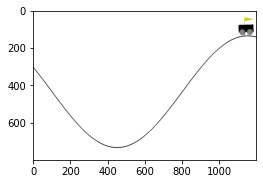

In [8]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()

    action = policy(obs, t) # call your policy
    obs, reward, done, _ = env.step(action) # pass the action chosen by the policy to the environment

    # We do not do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw the game image on display
    plt.imshow(env.render("rgb_array"))

    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

In [9]:
assert obs[0] > 0.47
print("You solved it!")

You solved it!
